In [61]:
# Source: https://www.youtube.com/watch?v=1S5UKLqe-gg&list=PLtQQKsdL7EPxd2nkEJmVkq0HCdEBER6OL&index=2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
# Import data for a few futures contracts
F_CL = pd.read_csv('C:/FuturesTickerData/F_CL.txt', parse_dates=['DATE'], index_col=['DATE'])
F_ES = pd.read_csv('C:/FuturesTickerData/F_ES.txt', parse_dates=['DATE'], index_col=['DATE'])
F_GC = pd.read_csv('C:/FuturesTickerData/F_GC.txt', parse_dates=['DATE'], index_col=['DATE'])
F_TY = pd.read_csv('C:/FuturesTickerData/F_TY.txt', parse_dates=['DATE'], index_col=['DATE'])
F_YM = pd.read_csv('C:/FuturesTickerData/F_YM.txt', parse_dates=['DATE'], index_col=['DATE'])

In [63]:
daily_HL = (F_ES[' HIGH'] - F_ES[' LOW'])
daily_HL = pd.DataFrame(data = daily_HL, columns=['Daily Price Variation'])
daily_HL.head()

,Daily Price Variation
DATE,
1990-01-02,367.5
1990-01-03,175.0
1990-01-04,325.0
1990-01-05,265.0
1990-01-08,240.0


In [64]:
ES_daily_shift = (F_ES[' OPEN'] - F_ES[' OPEN'].shift(1))
ES_daily_shift = pd.DataFrame(data = ES_daily_shift)
ES_daily_shift.columns = ['Daily Price Variation']
ES_daily_shift.dropna().head()

,Daily Price Variation
DATE,
1990-01-03,340.0
1990-01-04,-85.0
1990-01-05,-112.5
1990-01-08,-255.0
1990-01-09,182.5


In [65]:
F_ES.groupby(pd.Grouper(freq='M')).max().head()

,OPEN,HIGH,LOW,CLOSE,VOL,OI,P,R,RINFO
DATE,,,,,,,,,
1990-01-31,18160.0,18240.0,18065.0,18125.0,65077,112677,0,0,0.0
1990-02-28,16800.0,16915.0,16680.0,16807.5,63744,110029,0,0,0.0
1990-03-31,17335.0,17457.5,17202.5,17380.0,67804,111028,199006,199006,180.0
1990-04-30,17475.0,17540.0,17310.0,17405.0,54997,117783,0,0,0.0
1990-05-31,18180.0,18195.0,18065.0,18150.0,70370,117788,0,0,0.0


In [66]:
F_ES.groupby(pd.Grouper(freq='M')).min().head()

,OPEN,HIGH,LOW,CLOSE,VOL,OI,P,R,RINFO
DATE,,,,,,,,,
1990-01-31,16262.5,16395.0,16037.5,16260.0,33052,103532,0,0,0.0
1990-02-28,16200.0,16360.0,16125.0,16275.0,31637,96729,0,0,0.0
1990-03-31,16625.0,16775.0,16577.5,16690.0,30818,69934,0,0,0.0
1990-04-30,16462.5,16645.0,16430.0,16442.5,26905,107042,0,0,0.0
1990-05-31,16650.0,16725.0,16587.5,16682.5,29665,92574,0,0,0.0


In [67]:
ES_month_groupby = F_ES.groupby(pd.Grouper(freq='M'))
ES_month_difference = (ES_month_groupby[' OPEN'].
                       max() - ES_month_groupby[' OPEN'].min())
ES_month_difference = pd.DataFrame(data = ES_month_difference)
ES_month_difference.columns = ['Monthly Price Variation']
ES_month_difference.head()

,Monthly Price Variation
DATE,
1990-01-31,1897.5
1990-02-28,600.0
1990-03-31,710.0
1990-04-30,1012.5
1990-05-31,1530.0


In [68]:
ES_year_groupby = F_ES.groupby(pd.Grouper(freq='A'))
ES_year_difference = (ES_year_groupby[' OPEN'].
                      max() - ES_year_groupby[' OPEN'].min())
ES_year_difference = pd.DataFrame(data = ES_year_difference)
ES_year_difference.columns = ['Yearly Price Variation']
ES_year_difference.head()

,Yearly Price Variation
DATE,
1990-12-31,3740.0
1991-12-31,5195.0
1992-12-31,2322.5
1993-12-31,2150.0
1994-12-31,1977.5


## Price Variation Charts

In [69]:
F_ES_1 = F_ES.reset_index()
ES_daily_shift = ES_daily_shift.reset_index()
ES_month_difference = ES_month_difference.reset_index()
ES_year_difference = ES_year_difference.reset_index()
F_ES.head()

,OPEN,HIGH,LOW,CLOSE,VOL,OI,P,R,RINFO
DATE,,,,,,,,,
1990-01-02,17820.0,18142.5,17775.0,18125.0,33052,105621,0,0,0.0
1990-01-03,18160.0,18240.0,18065.0,18085.0,41456,105464,0,0,0.0
1990-01-04,18075.0,18130.0,17805.0,17992.5,45871,104880,0,0,0.0
1990-01-05,17962.5,17980.0,17715.0,17730.0,42786,103532,0,0,0.0
1990-01-08,17707.5,17920.0,17680.0,17877.5,41144,105653,0,0,0.0


Text(0.5,0,u'Year')

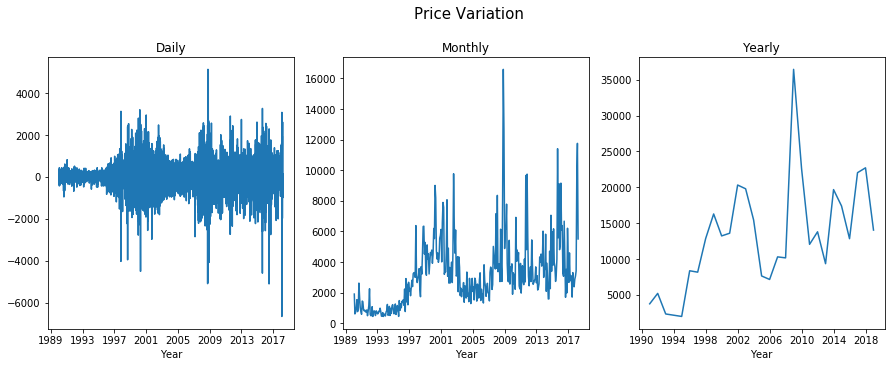

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.suptitle('Price Variation', size=15, x=.515, y=1.02)
axes[0].plot('DATE', 'Daily Price Variation', data=ES_daily_shift)
axes[0].set_title('Daily')
axes[0].set_xlabel('Year', fontsize=10)
axes[1].plot('DATE', 'Monthly Price Variation', data=ES_month_difference)
axes[1].set_title('Monthly')
axes[1].set_xlabel('Year', fontsize=10)
axes[2].plot('DATE', 'Yearly Price Variation', data=ES_year_difference)
axes[2].set_title('Yearly')
axes[2].set_xlabel('Year', fontsize=10)

## Volume

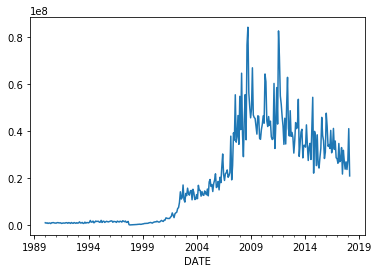

In [71]:
ES_month_volume = F_ES[' VOL'].groupby(pd.Grouper(freq='M')).sum().dropna()
ES_month_volume = pd.DataFrame(data = ES_month_volume)
ES_month_volume = ES_month_volume.reset_index()
ES_month_volume.plot('DATE', ' VOL', legend=None)